### IMPORTS 

In [119]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import multiprocessing
import time

from sklearn.metrics import accuracy_score
from weatherbit.api import Api

### Flight Data

In [2]:
#Create a dataframe to read the csv file
df_stats = pd.read_csv('Detailed_Statistics_Arrivals.csv')

In [3]:
df_stats.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/2022,1282,N4901U,IAD,23:10,0:01,70,76,51,23:55,6,23,0,6,0,22
1,UA,1/1/2023,604,N814UA,DEN,14:58,14:52,193,177,-6,14:48,4,0,0,0,0,0
2,UA,1/1/2023,2488,N38458,EWR,23:14,23:15,75,62,1,23:10,5,0,0,0,0,0
3,UA,1/1/2023,2645,N23721,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0
4,UA,1/2/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0


In [4]:
df_stats.tail()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
2144,UA,12/31/2019,1460,N838UA,EWR,18:15,18:14,75,60,-1,18:08,6,0,0,0,0,0
2145,UA,12/31/2021,467,N872UA,IAD,18:38,18:32,78,68,-6,18:27,5,0,0,0,0,0
2146,UA,12/31/2022,604,N801UA,DEN,14:58,14:46,193,178,-12,14:39,7,0,0,0,0,0
2147,UA,12/31/2022,1998,N23707,ORD,21:08,20:44,113,98,-24,20:40,4,0,0,0,0,0
2148,UA,12/31/2022,2488,N37427,EWR,23:14,0:46,75,73,92,0:40,6,92,0,0,0,0


### Data Preprocessing

In [5]:
df_stats.shape

(2149, 17)

In [6]:
df_stats.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)'],
      dtype='object')

In [7]:
df_stats.dtypes

Carrier Code                                object
Date (MM/DD/YYYY)                           object
Flight Number                                int64
Tail Number                                 object
Origin Airport                              object
Scheduled Arrival Time                      object
Actual Arrival Time                         object
Scheduled Elapsed Time (Minutes)             int64
Actual Elapsed Time (Minutes)                int64
Arrival Delay (Minutes)                      int64
Wheels-on Time                              object
Taxi-In time (Minutes)                       int64
Delay Carrier (Minutes)                      int64
Delay Weather (Minutes)                      int64
Delay National Aviation System (Minutes)     int64
Delay Security (Minutes)                     int64
Delay Late Aircraft Arrival (Minutes)        int64
dtype: object

In [8]:
df_stats.isna().sum()
df_stats = df_stats.dropna()

In [9]:
df_stats.isna().sum()

Carrier Code                                0
Date (MM/DD/YYYY)                           0
Flight Number                               0
Tail Number                                 0
Origin Airport                              0
Scheduled Arrival Time                      0
Actual Arrival Time                         0
Scheduled Elapsed Time (Minutes)            0
Actual Elapsed Time (Minutes)               0
Arrival Delay (Minutes)                     0
Wheels-on Time                              0
Taxi-In time (Minutes)                      0
Delay Carrier (Minutes)                     0
Delay Weather (Minutes)                     0
Delay National Aviation System (Minutes)    0
Delay Security (Minutes)                    0
Delay Late Aircraft Arrival (Minutes)       0
dtype: int64

In [10]:
df_stats = df_stats.iloc[:,[0,1,2,4,5,6,9]]
df_stats.head(4)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes)
0,UA,1/1/2022,1282,IAD,23:10,0:01,51
1,UA,1/1/2023,604,DEN,14:58,14:52,-6
2,UA,1/1/2023,2488,EWR,23:14,23:15,1
3,UA,1/1/2023,2645,ORD,23:57,23:47,-10


In [11]:
#merging two columns to match the test set column
df_stats['Flight Number'] = df_stats['Flight Number'].astype(int)
df_stats['Flight Number'] = df_stats['Flight Number'].astype(str)

In [12]:
#dropping original columns as well as the 'Tail Number' as it is not relevant
df_stats['Flight_Number'] = df_stats['Carrier Code'] + " " + df_stats['Flight Number']
df_stats.drop(columns=['Carrier Code','Flight Number'],inplace=True)

In [13]:
df_stats.head()

,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes),Flight_Number
0,1/1/2022,IAD,23:10,0:01,51,UA 1282
1,1/1/2023,DEN,14:58,14:52,-6,UA 604
2,1/1/2023,EWR,23:14,23:15,1,UA 2488
3,1/1/2023,ORD,23:57,23:47,-10,UA 2645
4,1/2/2022,IAD,23:10,23:27,17,UA 1282


In [14]:
df_stats['Scheduled arrival (DateTime)'] = pd.concat([df_stats['Scheduled Arrival Time'], df_stats['Date (MM/DD/YYYY)']], axis=1).apply(lambda x: ' '.join(x), axis=1)

In [15]:
df_stats['Scheduled arrival'] = pd.to_datetime(df_stats['Scheduled arrival (DateTime)'])
df_stats.head()

,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes),Flight_Number,Scheduled arrival (DateTime),Scheduled arrival
0,1/1/2022,IAD,23:10,0:01,51,UA 1282,23:10 1/1/2022,2022-01-01 23:10:00
1,1/1/2023,DEN,14:58,14:52,-6,UA 604,14:58 1/1/2023,2023-01-01 14:58:00
2,1/1/2023,EWR,23:14,23:15,1,UA 2488,23:14 1/1/2023,2023-01-01 23:14:00
3,1/1/2023,ORD,23:57,23:47,-10,UA 2645,23:57 1/1/2023,2023-01-01 23:57:00
4,1/2/2022,IAD,23:10,23:27,17,UA 1282,23:10 1/2/2022,2022-01-02 23:10:00


In [16]:
max(df_stats["Scheduled arrival"])


Timestamp('2023-01-31 23:12:00')

In [17]:
min(df_stats["Scheduled arrival"])

Timestamp('2017-06-08 16:37:00')

In [18]:
df_stats.drop(columns=['Date (MM/DD/YYYY)','Scheduled Arrival Time','Scheduled arrival (DateTime)'],inplace=True)

In [19]:
df_stats.head(2)

,Origin Airport,Actual Arrival Time,Arrival Delay (Minutes),Flight_Number,Scheduled arrival
0,IAD,0:01,51,UA 1282,2022-01-01 23:10:00
1,DEN,14:52,-6,UA 604,2023-01-01 14:58:00


In [20]:
df_stats['Year']=df_stats[ "Scheduled arrival"].dt.year
df_stats['Month']=df_stats[ "Scheduled arrival"].dt.month
df_stats['Day']=df_stats[ "Scheduled arrival"].dt.day
df_stats['Hour']=df_stats[ "Scheduled arrival"].dt.hour
df_stats['Minutes']=df_stats[ "Scheduled arrival"].dt.minute
df_stats['Day of week']=df_stats[ "Scheduled arrival"].dt.weekday

In [21]:
arrival = []
for index,row in df_stats.iterrows():
  if row[2] <= -10:
    arrival.append(0) #early
  elif row[2] > -10 and row[2] <= 10:
    arrival.append(1) #ontime
  elif row[2] > 10 and row[2] <= 30:
    arrival.append(2) #late
  else:
    arrival.append(3) #severely late
df_stats['Arrival Type'] = arrival

In [22]:
df_stats.head(2)

,Origin Airport,Actual Arrival Time,Arrival Delay (Minutes),Flight_Number,Scheduled arrival,Year,Month,Day,Hour,Minutes,Day of week,Arrival Type
0,IAD,0:01,51,UA 1282,2022-01-01 23:10:00,2022,1,1,23,10,5,3
1,DEN,14:52,-6,UA 604,2023-01-01 14:58:00,2023,1,1,14,58,6,1


### Weather Data

In [25]:
### Code to extract data from API
	#from weatherbit.api import Api
	#api_key = "bb19b1e7f70a4155abfc8f1dc0f92e20"
	#lat = 35.50
	#lon = -78.50

	#api = Api(api_key)


	# Get sub-hourly history by lat/lon:
	#api.set_granularity('hourly')
    #forecast = api.get_forecast(city="Syracuse", state="New York", country="US", hours=240)

	#history = api.get_history(lat=lat, lon=lon, start_date='2023-04-21',end_date='2023-04-24')

	# To get a daily time series of temperature, precipitation, and rh:
	#print(history.get_series(['temp','weather']))


In [26]:
#data = pd.DataFrame(history.get_series(['temp','weather']))

In [23]:
df_weather = pd.read_csv('weather.csv')
df_weather.head()

,Unnamed: 0,temp,weather,datetime
0,0,7.0,Fog,2022-01-06 00:00:00
1,1,8.0,Fog,2022-01-06 01:00:00
2,2,7.0,Haze,2022-01-06 02:00:00
3,3,3.0,Fog,2022-01-06 03:00:00
4,4,3.0,Fog,2022-01-06 04:00:00


In [27]:
df_weather.shape

(52488, 4)

### Preprocessing

In [28]:
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather.head()

,Unnamed: 0,temp,weather,datetime
0,0,7.0,Fog,2022-01-06 00:00:00
1,1,8.0,Fog,2022-01-06 01:00:00
2,2,7.0,Haze,2022-01-06 02:00:00
3,3,3.0,Fog,2022-01-06 03:00:00
4,4,3.0,Fog,2022-01-06 04:00:00


In [29]:
df_weather.drop(columns=['Unnamed: 0'],inplace=True)

In [30]:
df_stats["hour_datetime"] = df_stats["Scheduled arrival"].dt.round("H")
df_stats.head()
df_stats.isna().sum()

Origin Airport             0
Actual Arrival Time        0
Arrival Delay (Minutes)    0
Flight_Number              0
Scheduled arrival          0
Year                       0
Month                      0
Day                        0
Hour                       0
Minutes                    0
Day of week                0
Arrival Type               0
hour_datetime              0
dtype: int64

In [31]:
newdf = pd.merge(df_stats, df_weather,left_on='hour_datetime',right_on = 'datetime')
newdf.head()

,Origin Airport,Actual Arrival Time,Arrival Delay (Minutes),Flight_Number,Scheduled arrival,Year,Month,Day,Hour,Minutes,Day of week,Arrival Type,hour_datetime,temp,weather,datetime
0,IAD,0:01,51,UA 1282,2022-01-01 23:10:00,2022,1,1,23,10,5,3,2022-01-01 23:00:00,23.0,Overcast clouds,2022-01-01 23:00:00
1,DEN,14:52,-6,UA 604,2023-01-01 14:58:00,2023,1,1,14,58,6,1,2023-01-01 15:00:00,13.0,Overcast clouds,2023-01-01 15:00:00
2,EWR,23:15,1,UA 2488,2023-01-01 23:14:00,2023,1,1,23,14,6,1,2023-01-01 23:00:00,12.0,Clear Sky,2023-01-01 23:00:00
3,ORD,23:47,-10,UA 2645,2023-01-01 23:57:00,2023,1,1,23,57,6,0,2023-01-02 00:00:00,10.0,Fog,2023-01-02 00:00:00
4,IAD,23:27,17,UA 1282,2022-01-02 23:10:00,2022,1,2,23,10,6,2,2022-01-02 23:00:00,20.0,Light rain,2022-01-02 23:00:00


In [32]:
newdf.shape

(2014, 16)

In [33]:
newdf.drop(columns=['Actual Arrival Time','Day of week','hour_datetime','datetime','Scheduled arrival'],inplace=True)
newdf.head()

,Origin Airport,Arrival Delay (Minutes),Flight_Number,Year,Month,Day,Hour,Minutes,Arrival Type,temp,weather
0,IAD,51,UA 1282,2022,1,1,23,10,3,23.0,Overcast clouds
1,DEN,-6,UA 604,2023,1,1,14,58,1,13.0,Overcast clouds
2,EWR,1,UA 2488,2023,1,1,23,14,1,12.0,Clear Sky
3,ORD,-10,UA 2645,2023,1,1,23,57,0,10.0,Fog
4,IAD,17,UA 1282,2022,1,2,23,10,2,20.0,Light rain


In [34]:
newdf.shape

(2014, 11)

In [35]:
newdf.drop(columns=['Flight_Number'],inplace=True)
newdf.head()

,Origin Airport,Arrival Delay (Minutes),Year,Month,Day,Hour,Minutes,Arrival Type,temp,weather
0,IAD,51,2022,1,1,23,10,3,23.0,Overcast clouds
1,DEN,-6,2023,1,1,14,58,1,13.0,Overcast clouds
2,EWR,1,2023,1,1,23,14,1,12.0,Clear Sky
3,ORD,-10,2023,1,1,23,57,0,10.0,Fog
4,IAD,17,2022,1,2,23,10,2,20.0,Light rain


In [36]:
newdf.head(15)


,Origin Airport,Arrival Delay (Minutes),Year,Month,Day,Hour,Minutes,Arrival Type,temp,weather
0,IAD,51,2022,1,1,23,10,3,23.0,Overcast clouds
1,DEN,-6,2023,1,1,14,58,1,13.0,Overcast clouds
2,EWR,1,2023,1,1,23,14,1,12.0,Clear Sky
3,ORD,-10,2023,1,1,23,57,0,10.0,Fog
4,IAD,17,2022,1,2,23,10,2,20.0,Light rain
5,DEN,155,2023,1,2,15,1,3,9.0,Fog
6,IAD,27,2023,1,2,23,12,2,12.0,Fog
7,ORD,-21,2023,1,2,21,7,0,13.0,Overcast clouds
8,IAD,21,2022,1,3,23,10,2,3.0,Clear Sky
9,DEN,-6,2023,1,3,14,58,1,16.0,Overcast clouds


### One Hot Encoding Application

In [37]:
from sklearn.preprocessing import OneHotEncoder
def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names_out())
    # If you have a newer version, replace with columns=ohe.get_feature_names_out()
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [38]:
finaldf = get_ohe(newdf, 'Origin Airport')
finaldf

C:\Users\shriy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Arrival Delay (Minutes),Year,Month,Day,Hour,Minutes,Arrival Type,temp,weather,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,51,2022,1,1,23,10,3,23.0,Overcast clouds,0,1,0
1,-6,2023,1,1,14,58,1,13.0,Overcast clouds,0,0,0
2,1,2023,1,1,23,14,1,12.0,Clear Sky,1,0,0
3,-10,2023,1,1,23,57,0,10.0,Fog,0,0,1
4,17,2022,1,2,23,10,2,20.0,Light rain,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,-1,2019,12,31,18,15,1,14.0,Clear Sky,1,0,0
2010,-6,2021,12,31,18,38,1,21.1,Overcast clouds,0,1,0
2011,-12,2022,12,31,14,58,0,15.0,Fog,0,0,0
2012,-24,2022,12,31,21,8,0,20.0,Light rain,0,0,1


In [39]:
finaldf1 = get_ohe(finaldf, 'weather')
finaldf1

C:\Users\shriy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Arrival Delay (Minutes),Year,Month,Day,Hour,Minutes,Arrival Type,temp,Origin Airport_EWR,Origin Airport_IAD,...,weather_Few clouds,weather_Fog,weather_Haze,weather_Heavy rain,weather_Light rain,weather_Light snow,weather_Moderate rain,weather_Overcast clouds,weather_Scattered clouds,weather_Thunderstorm with heavy rain
0,51,2022,1,1,23,10,3,23.0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-6,2023,1,1,14,58,1,13.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2023,1,1,23,14,1,12.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-10,2023,1,1,23,57,0,10.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,17,2022,1,2,23,10,2,20.0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,-1,2019,12,31,18,15,1,14.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2010,-6,2021,12,31,18,38,1,21.1,0,1,...,0,0,0,0,0,0,0,1,0,0
2011,-12,2022,12,31,14,58,0,15.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2012,-24,2022,12,31,21,8,0,20.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
finaldf1.dtypes

Arrival Delay (Minutes)                   int64
Year                                      int64
Month                                     int64
Day                                       int64
Hour                                      int64
Minutes                                   int64
Arrival Type                              int64
temp                                    float64
Origin Airport_EWR                        int32
Origin Airport_IAD                        int32
Origin Airport_ORD                        int32
weather_Clear Sky                         int32
weather_Few clouds                        int32
weather_Fog                               int32
weather_Haze                              int32
weather_Heavy rain                        int32
weather_Light rain                        int32
weather_Light snow                        int32
weather_Moderate rain                     int32
weather_Overcast clouds                   int32
weather_Scattered clouds                

In [41]:
finaldf1.drop(columns=['Arrival Delay (Minutes)'],inplace=True)

### Train/Test Data

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['SalePrice']), subset_data['SalePrice'], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(finaldf1.drop(columns = ['Arrival Type']), finaldf1['Arrival Type'], test_size=0.25, random_state=35)
# Pick a random_state as below and keep using the same number (example 35) to repeat the same test and train data
# X_train, X_test, y_train, y_test = train_test_split(subset_data['bmi'], subset_data['charges'], test_size=0.25, random_state=35)
X_train
X_test
y_train
y_test

723     1
584     1
479     3
143     0
863     1
       ..
1911    1
1982    3
1768    1
1764    3
613     1
Name: Arrival Type, Length: 504, dtype: int64

### CLASSIFIERS

#### Predictions and Accuracies

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

In [46]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [47]:
X_train.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minutes', 'temp', 'Origin Airport_EWR',
       'Origin Airport_IAD', 'Origin Airport_ORD', 'weather_Clear Sky',
       'weather_Few clouds', 'weather_Fog', 'weather_Haze',
       'weather_Heavy rain', 'weather_Light rain', 'weather_Light snow',
       'weather_Moderate rain', 'weather_Overcast clouds',
       'weather_Scattered clouds', 'weather_Thunderstorm with heavy rain'],
      dtype='object')

In [48]:
### To check which features are really important for prediction
gb_clf.feature_importances_

array([0.05714537, 0.1130881 , 0.1953352 , 0.08092252, 0.14272142,
       0.26711666, 0.00520921, 0.00954559, 0.0525681 , 0.0076181 ,
       0.0056095 , 0.00735232, 0.00115683, 0.0105928 , 0.01531418,
       0.00171056, 0.00453756, 0.01073728, 0.00415589, 0.0075628 ])

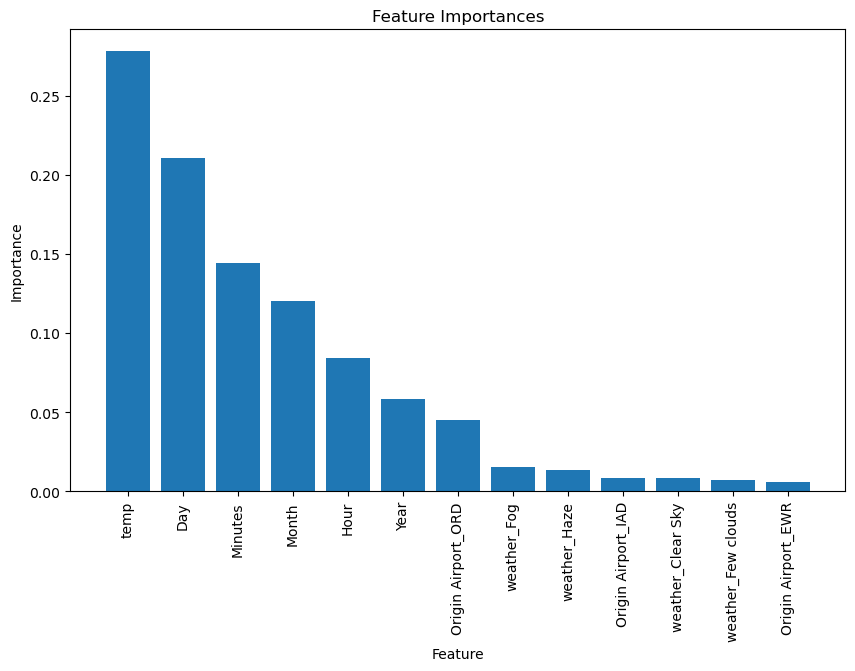

In [118]:
importances = gb_clf.feature_importances_

# Get the names of the features
feature_names = list(X_train.columns)

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances using a bar chart
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [49]:
round(gb_clf.score(X_train, y_train),2)

0.62

In [50]:
y_pred_gb = gb_clf.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

In [51]:
print("Gradient Boosting Classifier Accuracy:", round(acc_gb,2))

Gradient Boosting Classifier Accuracy: 0.43


In [52]:
test_output_gb = pd.DataFrame(gb_clf.predict(X_test), index = X_test.index, columns = ['pred_type'])
test_output_gb.head()

,pred_type
723,1
584,0
479,1
143,1
863,1


In [53]:
test_output_gb = test_output_gb.merge(y_test, left_index = True, right_index = True)
test_output_gb.head()


,pred_type,Arrival Type
723,1,1
584,0,1
479,1,3
143,1,0
863,1,1


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth= 7, min_samples_leaf= 4, min_samples_split = 2, n_estimators=100)

# fit the model to the training data
rf_clf.fit(X_train,y_train)
round(rf_clf.score(X_train,y_train),2)

0.55

In [55]:
rf_clf.feature_importances_

array([0.07967868, 0.14307287, 0.15863073, 0.08096577, 0.15898389,
       0.19624425, 0.00395827, 0.02389885, 0.06640177, 0.03109272,
       0.00098148, 0.00929802, 0.        , 0.00310053, 0.01463521,
       0.        , 0.00171643, 0.02567198, 0.00053162, 0.00113694])

In [56]:
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [57]:
print("Random Forest Classifier Accuracy:", round(acc_rf,2))

Random Forest Classifier Accuracy: 0.46


In [58]:
test_output_rf = pd.DataFrame(rf_clf.predict(X_test), index = X_test.index, columns = ['pred_type'])
test_output_rf.head()

,pred_type
723,1
584,0
479,1
143,1
863,1


In [59]:
test_output_rf = test_output_rf.merge(y_test, left_index = True, right_index = True)
test_output_rf.head()


,pred_type,Arrival Type
723,1,1
584,0,1
479,1,3
143,1,0
863,1,1


In [60]:
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2', max_iter = 10000)
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train,y_train) 
round(model.score(X_train,y_train),2)

0.43

In [61]:
y_pred_lr = model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [62]:
print("Logistic Regression Accuracy:", round(acc_lr,2))

Logistic Regression Accuracy: 0.43


In [63]:
test_output_lr = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_type'])
test_output_lr.head()

,pred_type
723,1
584,0
479,1
143,1
863,1


In [64]:
test_output_lr = test_output_lr.merge(y_test, left_index = True, right_index = True)
test_output_lr.head()

,pred_type,Arrival Type
723,1,1
584,0,1
479,1,3
143,1,0
863,1,1


In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 10, random_state=50)

In [66]:
dt_clf.fit(X_train, y_train)
round(dt_clf.score(X_train,y_train),2)


0.48

In [83]:
y_pred_dt = dt_clf.predict(X_test)

In [84]:
acc_dtree = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", round(acc_dtree,2))

Decision Tree Classifier Accuracy: 0.42


In [70]:
test_output_dt = pd.DataFrame(dt_clf.predict(X_test), index = X_test.index, columns = ['pred_type'])
test_output_dt.head()

,pred_type
723,1
584,0
479,1
143,1
863,1


In [71]:
test_output_dt = test_output_dt.merge(y_test, left_index = True, right_index = True)
test_output_dt.head()

,pred_type,Arrival Type
723,1,1
584,0,1
479,1,3
143,1,0
863,1,1


In [62]:
!pip install xgboost

In [71]:
X_train.head(2)

,Year,Month,Day,Hour,Minutes,temp,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD,weather_Clear Sky,weather_Few clouds,weather_Fog,weather_Haze,weather_Heavy rain,weather_Light rain,weather_Light snow,weather_Moderate rain,weather_Overcast clouds,weather_Scattered clouds,weather_Thunderstorm with heavy rain
684,2022,6,18,23,37,28.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
25,2019,1,9,20,49,12.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [72]:
X_test.head(2)

,Year,Month,Day,Hour,Minutes,temp,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD,weather_Clear Sky,weather_Few clouds,weather_Fog,weather_Haze,weather_Heavy rain,weather_Light rain,weather_Light snow,weather_Moderate rain,weather_Overcast clouds,weather_Scattered clouds,weather_Thunderstorm with heavy rain
723,2022,6,25,15,4,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
584,2022,5,29,20,51,31.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [72]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=4, colsample_bytree = 0.6, gamma = 0.2, learning_rate= 0.01, max_depth= 7, min_child_weight = 5, n_estimators = 100, subsample= 0.8)

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)
round(xgb_clf.score(X_train,y_train),2)


0.59

In [74]:
# Make predictions on the test data
y_pred = xgb_clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", round(accuracy,2))

XGBoost Accuracy: 0.46


### Hyper Paramter Tuning for best hyperparameters

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtc = DecisionTreeClassifier(random_state=50)
grid_search_dt = GridSearchCV(dtc, param_grid=param_grid_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)

Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [85]:
param_grid_rf = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=50)
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

Best Random Forest Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [97]:
from xgboost import XGBClassifier
param_grid_xgb = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgbc = XGBClassifier(objective='multi:softmax', num_class=4, random_state=50)
grid_search_xgb = GridSearchCV(xgbc, param_grid=param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

Best XGBoost Parameters: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}


### OUT SAMPLE TESTING

In [75]:
preddf = pd.read_csv('project csv(Apr 21-24).csv')

In [76]:
preddf.head(2)

,Date,Day,Origin Airport,Flight Number,Arrival Time,"Status (Early, On-time, Late, Severly Late)"
0,4/21/2023,Friday,ORD,UA 3839,10:00 AM,NaN
1,4/21/2023,Friday,ORD,UA 3524,4:50 PM,NaN


#### Out sample Data Preprocessing

In [77]:
preddf['Date'] = pd.to_datetime(preddf['Date'])

# merge Arrival Time and Date columns
preddf['Arrival'] = preddf['Date'].dt.strftime('%Y-%m-%d') + ' ' + preddf['Arrival Time']
preddf

,Date,Day,Origin Airport,Flight Number,Arrival Time,"Status (Early, On-time, Late, Severly Late)",Arrival
0,2023-04-21,Friday,ORD,UA 3839,10:00 AM,NaN,2023-04-21 10:00 AM
1,2023-04-21,Friday,ORD,UA 3524,4:50 PM,NaN,2023-04-21 4:50 PM
2,2023-04-21,Friday,ORD,UA 538,9:34 PM,NaN,2023-04-21 9:34 PM
3,2023-04-22,Saturday,ORD,UA 3839,10:00 AM,NaN,2023-04-22 10:00 AM
4,2023-04-22,Saturday,ORD,UA 3524,4:50 PM,NaN,2023-04-22 4:50 PM
5,2023-04-22,Saturday,ORD,UA 538,9:34 PM,NaN,2023-04-22 9:34 PM
6,2023-04-23,Sunday,ORD,UA 3839,10:00 AM,NaN,2023-04-23 10:00 AM
7,2023-04-23,Sunday,ORD,UA 3524,4:55 PM,NaN,2023-04-23 4:55 PM
8,2023-04-23,Sunday,ORD,UA 538,9:34 PM,NaN,2023-04-23 9:34 PM
9,2023-04-24,Monday,ORD,UA 3839,10:00 AM,NaN,2023-04-24 10:00 AM


In [78]:
preddf['Arrival'] = pd.to_datetime(preddf['Arrival'])

In [79]:
preddf["hour_datetime"] = preddf["Arrival"].dt.round("H")
preddf

,Date,Day,Origin Airport,Flight Number,Arrival Time,"Status (Early, On-time, Late, Severly Late)",Arrival,hour_datetime
0,2023-04-21,Friday,ORD,UA 3839,10:00 AM,NaN,2023-04-21 10:00:00,2023-04-21 10:00:00
1,2023-04-21,Friday,ORD,UA 3524,4:50 PM,NaN,2023-04-21 16:50:00,2023-04-21 17:00:00
2,2023-04-21,Friday,ORD,UA 538,9:34 PM,NaN,2023-04-21 21:34:00,2023-04-21 22:00:00
3,2023-04-22,Saturday,ORD,UA 3839,10:00 AM,NaN,2023-04-22 10:00:00,2023-04-22 10:00:00
4,2023-04-22,Saturday,ORD,UA 3524,4:50 PM,NaN,2023-04-22 16:50:00,2023-04-22 17:00:00
5,2023-04-22,Saturday,ORD,UA 538,9:34 PM,NaN,2023-04-22 21:34:00,2023-04-22 22:00:00
6,2023-04-23,Sunday,ORD,UA 3839,10:00 AM,NaN,2023-04-23 10:00:00,2023-04-23 10:00:00
7,2023-04-23,Sunday,ORD,UA 3524,4:55 PM,NaN,2023-04-23 16:55:00,2023-04-23 17:00:00
8,2023-04-23,Sunday,ORD,UA 538,9:34 PM,NaN,2023-04-23 21:34:00,2023-04-23 22:00:00
9,2023-04-24,Monday,ORD,UA 3839,10:00 AM,NaN,2023-04-24 10:00:00,2023-04-24 10:00:00


In [80]:
preddf = preddf.drop(['Date','Day','Arrival Time', 'Status (Early, On-time, Late, Severly Late)' ],axis = 1)
preddf

,Origin Airport,Flight Number,Arrival,hour_datetime
0,ORD,UA 3839,2023-04-21 10:00:00,2023-04-21 10:00:00
1,ORD,UA 3524,2023-04-21 16:50:00,2023-04-21 17:00:00
2,ORD,UA 538,2023-04-21 21:34:00,2023-04-21 22:00:00
3,ORD,UA 3839,2023-04-22 10:00:00,2023-04-22 10:00:00
4,ORD,UA 3524,2023-04-22 16:50:00,2023-04-22 17:00:00
5,ORD,UA 538,2023-04-22 21:34:00,2023-04-22 22:00:00
6,ORD,UA 3839,2023-04-23 10:00:00,2023-04-23 10:00:00
7,ORD,UA 3524,2023-04-23 16:55:00,2023-04-23 17:00:00
8,ORD,UA 538,2023-04-23 21:34:00,2023-04-23 22:00:00
9,ORD,UA 3839,2023-04-24 10:00:00,2023-04-24 10:00:00


In [81]:
preddf['Year']=preddf[ "Arrival"].dt.year
preddf['Month']=preddf[ "Arrival"].dt.month
preddf['Day']=preddf[ "Arrival"].dt.day
preddf['Hour']=preddf[ "Arrival"].dt.hour
preddf['Minutes']=preddf[ "Arrival"].dt.minute


In [82]:
preddf = get_ohe(preddf, 'Origin Airport')
preddf

C:\Users\shriy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Flight Number,Arrival,hour_datetime,Year,Month,Day,Hour,Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,UA 3839,2023-04-21 10:00:00,2023-04-21 10:00:00,2023,4,21,10,0,0,0,1
1,UA 3524,2023-04-21 16:50:00,2023-04-21 17:00:00,2023,4,21,16,50,0,0,1
2,UA 538,2023-04-21 21:34:00,2023-04-21 22:00:00,2023,4,21,21,34,0,0,1
3,UA 3839,2023-04-22 10:00:00,2023-04-22 10:00:00,2023,4,22,10,0,0,0,1
4,UA 3524,2023-04-22 16:50:00,2023-04-22 17:00:00,2023,4,22,16,50,0,0,1
5,UA 538,2023-04-22 21:34:00,2023-04-22 22:00:00,2023,4,22,21,34,0,0,1
6,UA 3839,2023-04-23 10:00:00,2023-04-23 10:00:00,2023,4,23,10,0,0,0,1
7,UA 3524,2023-04-23 16:55:00,2023-04-23 17:00:00,2023,4,23,16,55,0,0,1
8,UA 538,2023-04-23 21:34:00,2023-04-23 22:00:00,2023,4,23,21,34,0,0,1
9,UA 3839,2023-04-24 10:00:00,2023-04-24 10:00:00,2023,4,24,10,0,0,0,1


### INCLUDING WEATHER DATA FOR FEATURE SET MATCHING

In [83]:
wedata = pd.read_csv('weather_2023.csv')

In [84]:
wedata.head(2)

,Unnamed: 0,temp,weather,timestamp_utc
0,0,20,Clear Sky,2023-04-21 00:00:00
1,1,18,Clear Sky,2023-04-21 01:00:00


In [85]:
wedata = wedata.drop(['Unnamed: 0' ],axis=1)
wedata

,temp,weather,timestamp_utc
0,20,Clear Sky,2023-04-21 00:00:00
1,18,Clear Sky,2023-04-21 01:00:00
2,16,Clear Sky,2023-04-21 02:00:00
3,16,Clear Sky,2023-04-21 03:00:00
4,14,Clear Sky,2023-04-21 04:00:00
...,...,...,...
67,21,Clear Sky,2023-04-23 19:00:00
68,22,Clear Sky,2023-04-23 20:00:00
69,21,Clear Sky,2023-04-23 21:00:00
70,22,Clear Sky,2023-04-23 22:00:00


In [86]:
preddf.head(3)

,Flight Number,Arrival,hour_datetime,Year,Month,Day,Hour,Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,UA 3839,2023-04-21 10:00:00,2023-04-21 10:00:00,2023,4,21,10,0,0,0,1
1,UA 3524,2023-04-21 16:50:00,2023-04-21 17:00:00,2023,4,21,16,50,0,0,1
2,UA 538,2023-04-21 21:34:00,2023-04-21 22:00:00,2023,4,21,21,34,0,0,1


In [87]:
preddf = preddf.drop(['Arrival' ],axis=1)
preddf

,Flight Number,hour_datetime,Year,Month,Day,Hour,Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,UA 3839,2023-04-21 10:00:00,2023,4,21,10,0,0,0,1
1,UA 3524,2023-04-21 17:00:00,2023,4,21,16,50,0,0,1
2,UA 538,2023-04-21 22:00:00,2023,4,21,21,34,0,0,1
3,UA 3839,2023-04-22 10:00:00,2023,4,22,10,0,0,0,1
4,UA 3524,2023-04-22 17:00:00,2023,4,22,16,50,0,0,1
5,UA 538,2023-04-22 22:00:00,2023,4,22,21,34,0,0,1
6,UA 3839,2023-04-23 10:00:00,2023,4,23,10,0,0,0,1
7,UA 3524,2023-04-23 17:00:00,2023,4,23,16,55,0,0,1
8,UA 538,2023-04-23 22:00:00,2023,4,23,21,34,0,0,1
9,UA 3839,2023-04-24 10:00:00,2023,4,24,10,0,0,0,1


In [88]:
preddf.dtypes

Flight Number                 object
hour_datetime         datetime64[ns]
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Minutes                        int64
Origin Airport_EWR             int32
Origin Airport_IAD             int32
Origin Airport_ORD             int32
dtype: object

In [89]:
wedata.dtypes

temp              int64
weather          object
timestamp_utc    object
dtype: object

In [90]:
wedata['timestamp_utc'] = pd.to_datetime(wedata['timestamp_utc'])

In [91]:
X_test = pd.merge(wedata, preddf, right_on="hour_datetime", left_on="timestamp_utc")

In [92]:
X_test = X_test.drop(['timestamp_utc','hour_datetime'],axis=1)

In [93]:
from sklearn.preprocessing import OneHotEncoder
def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names_out())
    # If you have a newer version, replace with columns=ohe.get_feature_names_out()
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [94]:
X_test = get_ohe(X_test, 'weather')


C:\Users\shriy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [95]:
X_test.columns

Index(['temp', 'Flight Number', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'Origin Airport_EWR', 'Origin Airport_IAD', 'Origin Airport_ORD',
       'weather_Clear Sky', 'weather_Fog', 'weather_Light rain',
       'weather_Overcast clouds'],
      dtype='object')

In [96]:
X_test.dtypes

temp                        int64
Flight Number              object
Year                        int64
Month                       int64
Day                         int64
Hour                        int64
Minutes                     int64
Origin Airport_EWR          int32
Origin Airport_IAD          int32
Origin Airport_ORD          int32
weather_Clear Sky           int32
weather_Fog                 int32
weather_Light rain          int32
weather_Overcast clouds     int32
dtype: object

In [97]:
X_test = X_test.drop(['Flight Number'],axis=1)


In [98]:
required_col = []
test_col = list(X_test.columns)

In [99]:
train_col = []
train_col = list(X_train.columns)

In [100]:
for x in train_col:
    if x in test_col:
        required_col.append(x)

In [101]:
X_Train_new = X_train[required_col]

In [102]:
X_Train_new.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minutes', 'temp', 'Origin Airport_EWR',
       'Origin Airport_IAD', 'Origin Airport_ORD', 'weather_Clear Sky',
       'weather_Fog', 'weather_Light rain', 'weather_Overcast clouds'],
      dtype='object')

In [103]:
X_test.columns

Index(['temp', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'Origin Airport_EWR',
       'Origin Airport_IAD', 'Origin Airport_ORD', 'weather_Clear Sky',
       'weather_Fog', 'weather_Light rain', 'weather_Overcast clouds'],
      dtype='object')

In [104]:
X_test = X_test[['Year', 'Month', 'Day', 'Hour', 'Minutes', 'temp', 'Origin Airport_EWR',
       'Origin Airport_IAD', 'Origin Airport_ORD', 'weather_Clear Sky',
       'weather_Fog', 'weather_Light rain', 'weather_Overcast clouds']]

### PREDICTIONS

In [115]:
rf_clf.fit(X_Train_new,y_train)
round(rf_clf.score(X_Train_new,y_train),2)

0.55

In [113]:
y_pred_rf = rf_clf.predict(X_test)

In [116]:
xgb_clf.fit(X_Train_new,y_train)
round(xgb_clf.score(X_Train_new,y_train),2)

0.58

In [112]:
status_df = pd.DataFrame({'Arrival Type(Status)': y_pred_rf})

In [117]:
status_df.to_csv("Predictions.csv")

#### -----------------------------------------------------------------